In [ ]:
# Install required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [594]:
# Load the dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
features = adult.data.features 
targets = adult.data.targets 

# Concatenate features and target
dataset = pd.concat([features, targets], axis=1)
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [601]:
# make a copy of the dataset
data = dataset.copy()

In [602]:
# Checking the data shape
data.shape

(48842, 15)

In [603]:
# Checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [604]:
# Checking null values
data.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [605]:
# Identify unique values in categorical columns
for column in data.columns:
    if data[column].dtype == 'object':
        unique_values = data[column].unique()
        print(f"\n{column}: \n{unique_values}")


workclass: 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

education: 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status: 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation: 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

relationship: 
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race: 
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex: 
['Male' 'Female']

native-country: 
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico

In [606]:
# Check for missing Values
data.isin({'?'}).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [607]:
# Replace "?" with NaN
data.replace("?", np.nan, inplace=True)

In [608]:
# Check for NaN Values
data.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [611]:
# Drop rows with missing values
data.dropna(inplace=True)
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [610]:
data.shape

(45222, 15)

In [367]:
# Check for duplicate
data.duplicated().sum()

28

In [368]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [369]:
# Verify
data.duplicated().sum()

0

In [370]:
# Check shape
data.shape

(45194, 15)

# I have dropped appr. 7.5% rows since they contained duplicates and missing values. I didn't use techniques like replacing them with mean and mode here. Because it may introduce bias when training.

In [612]:
# dropping education column
data = data.drop(columns = ['education'])

# I dropped the education column since it was parallel with the education-num column

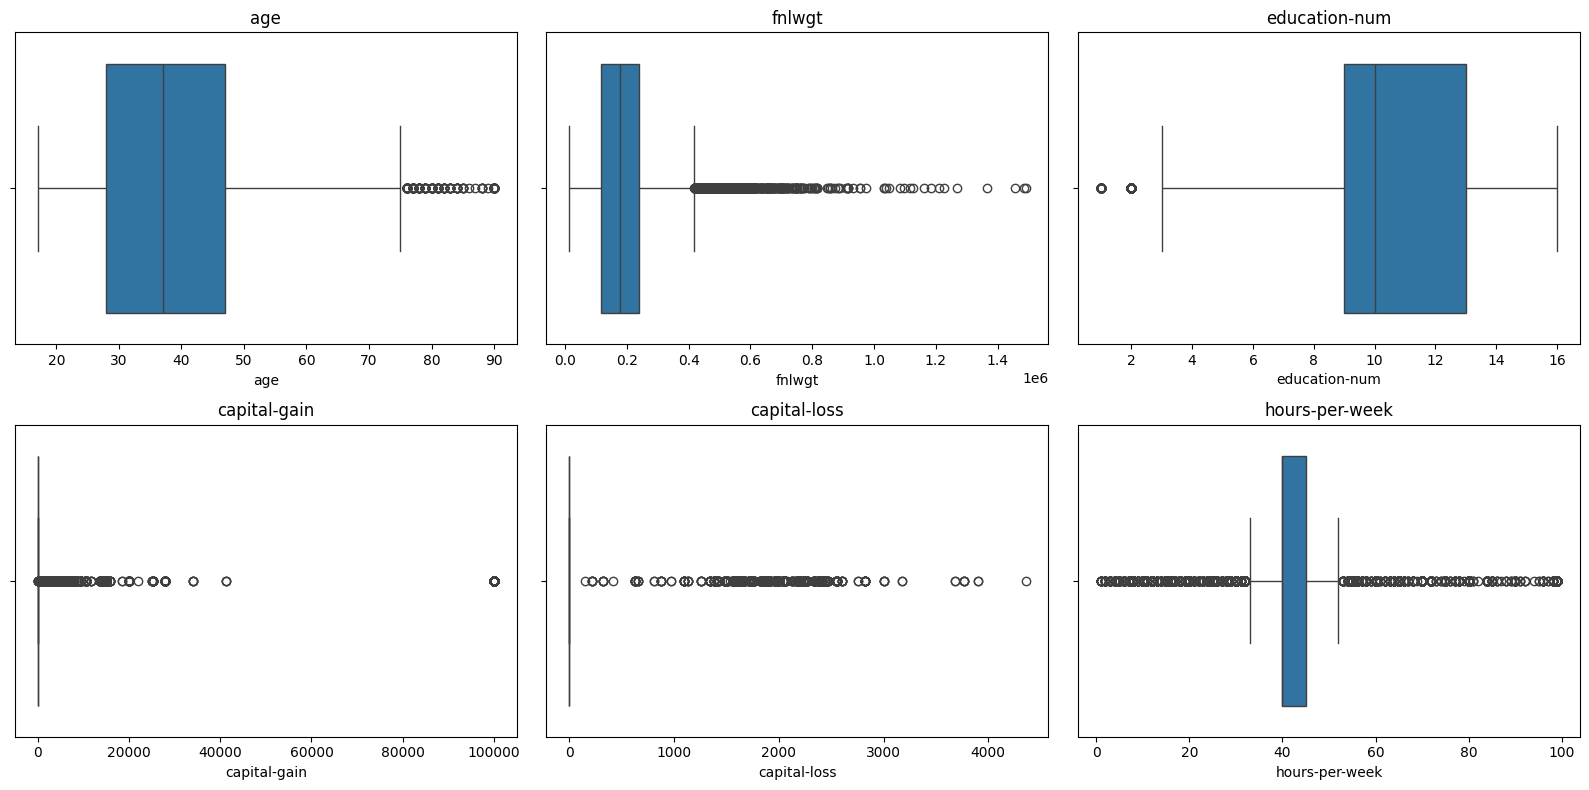

In [372]:
# Data Visualization
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Visualize numerical features using box plots
plt.figure(figsize=(16, 8))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [374]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45194.0,38.551755,13.215806,17.0,28.00,37.0,47.0,90.0
fnlwgt,45194.0,189737.853056,105640.654414,13492.0,117392.25,178312.0,237903.0,1490400.0
education-num,45194.0,10.119109,2.552057,1.0,9.00,10.0,13.0,16.0
capital-gain,45194.0,1102.112736,7508.705003,0.0,0.00,0.0,0.0,99999.0
capital-loss,45194.0,88.650308,405.075515,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45194.0,40.941209,12.006449,1.0,40.00,40.0,45.0,99.0


In [375]:
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt

# Perform winsorization on numerical columns
winsorized_data = data.copy()

# Winsorize at the 5th and 95th percentiles
for col in numerical_features:
    winsorized_data[col] = winsorize(data[col], limits=[0.025, 0.025])

winsorized_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45194.0,38.418219,12.819355,18.0,28.00,37.0,47.0,67.0
fnlwgt,45194.0,187317.507346,95999.361411,32372.0,117392.25,178312.0,237903.0,430828.0
education-num,45194.0,10.131433,2.457972,4.0,9.00,10.0,13.0,15.0
capital-gain,45194.0,500.133912,1808.031830,0.0,0.00,0.0,0.0,8614.0
capital-loss,45194.0,83.694849,378.722180,0.0,0.00,0.0,0.0,1887.0
hours-per-week,45194.0,40.872793,10.925764,15.0,40.00,40.0,45.0,70.0


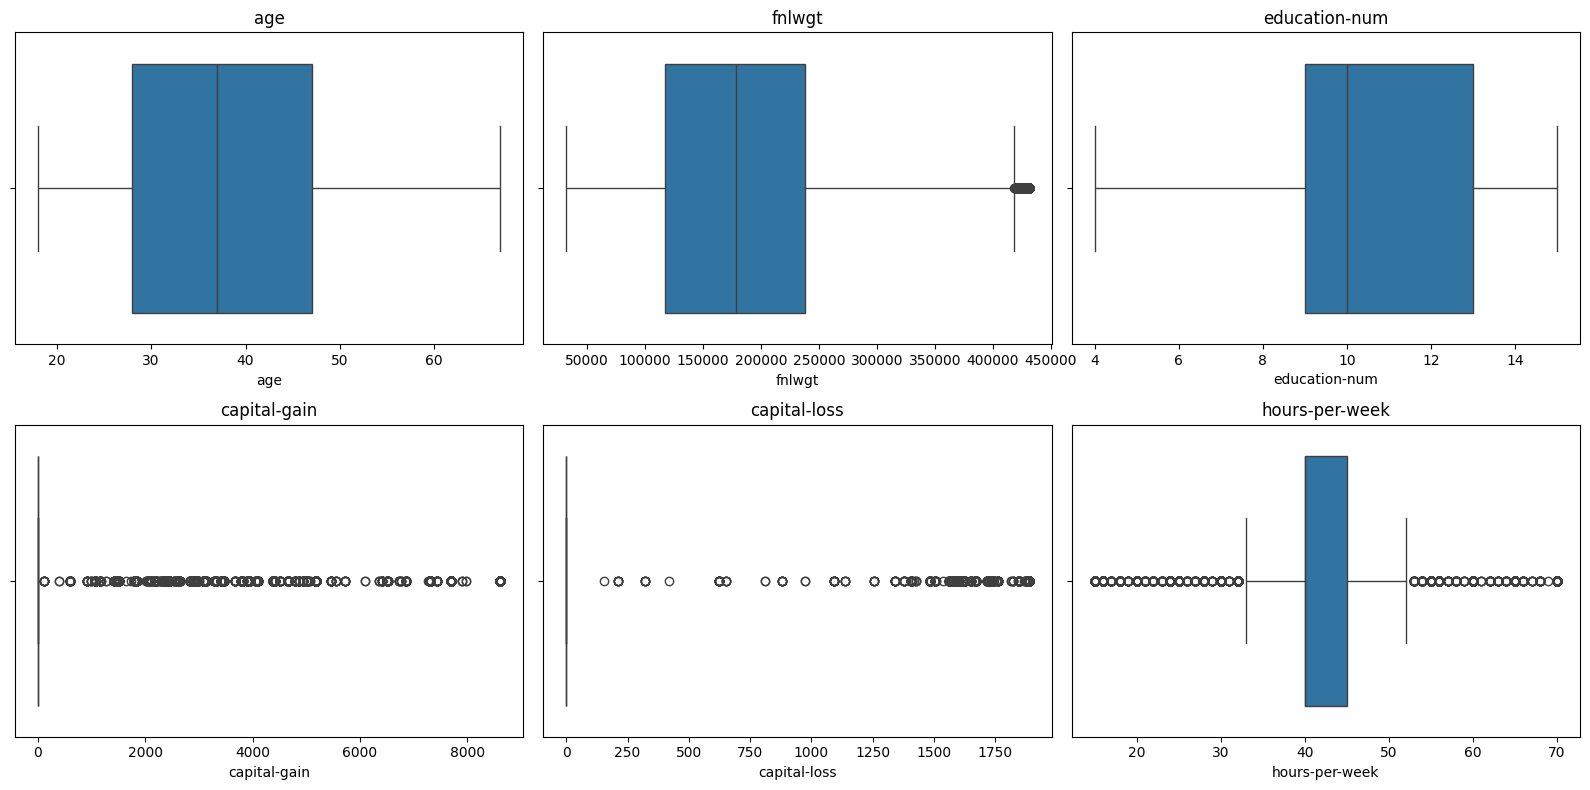

In [376]:
# Visualize numerical features using box plots
plt.figure(figsize=(16, 8))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=winsorized_data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [378]:
# Replace income with binary values
winsorized_data.replace(["<=50K.", "<=50K"], 0, inplace=True)

winsorized_data.replace([">50K.", ">50K"], 1, inplace=True)

In [379]:
winsorized_data['income'].value_counts()

income
0    33988
1    11206
Name: count, dtype: int64

In [380]:
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
corr = winsorized_data[numerical_columns].corr()

<Axes: >

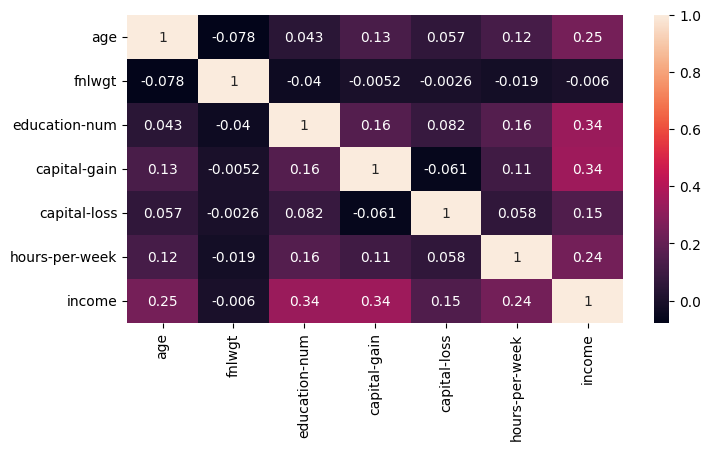

In [381]:
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True)

In [382]:
# dropping columns with negative correlations with income
winsorized_data = winsorized_data.drop(columns = ['fnlwgt'])

In [615]:
winsorized_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,15,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


# Label Encoding

In [570]:
en_data = winsorized_data.copy()

In [571]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

en_data['workclass'] = le.fit_transform(en_data['workclass'])
en_data['marital-status'] = le.fit_transform(en_data['marital-status'])
en_data['occupation'] = le.fit_transform(en_data['occupation'])
en_data['relationship'] = le.fit_transform(en_data['relationship'])
en_data['race'] = le.fit_transform(en_data['race'])
en_data['sex'] = le.fit_transform(en_data['sex'])
en_data['native-country'] = le.fit_transform(en_data['native-country'])

In [616]:
en_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,13,2,3,0,4,1,0,0,15,38,0
2,38,2,9,0,5,1,4,1,0,0,40,38,0
3,53,2,7,2,5,0,2,1,0,0,40,38,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0


In [617]:
en_data['income'].value_counts()

income
0    33988
1    11206
Name: count, dtype: int64

In [618]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
smote_features, smote_target = smote.fit_resample(en_data.drop('income', axis=1), en_data['income'])

# Concatenate SMOTE features and target
balanced_data = pd.concat([smote_features, smote_target], axis=1)

# shuffle the balanced data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [620]:
balanced_data['income'].value_counts()

income
1    33988
0    33988
Name: count, dtype: int64

In [621]:
balanced_data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,45,2,15,2,9,0,4,1,0,0,60,38,1
1,20,2,9,4,7,3,4,1,0,0,50,38,0
2,34,2,13,2,3,0,4,1,0,1887,45,38,1
3,51,2,9,2,2,0,4,1,0,0,40,38,1
4,19,2,9,4,2,3,4,1,0,0,20,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67971,49,2,10,2,7,2,4,1,0,0,35,38,0
67972,38,4,9,2,9,0,4,1,0,0,50,38,1
67973,49,3,14,0,9,4,4,0,0,0,62,1,1
67974,37,2,9,2,2,0,4,1,0,0,70,38,1


In [659]:
# Separate features (X) and target variable (y)
X = balanced_data.drop('income', axis=1)
y = balanced_data['income']

In [660]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,67976.0,40.148994,12.163563,18.0,31.0,40.0,49.0,67.0
workclass,67976.0,2.142948,0.930762,0.0,2.0,2.0,2.0,6.0
education-num,67976.0,10.539941,2.430623,4.0,9.0,10.0,13.0,15.0
marital-status,67976.0,2.391167,1.311420,0.0,2.0,2.0,4.0,6.0
occupation,67976.0,6.028716,3.988136,0.0,3.0,6.0,9.0,13.0
relationship,67976.0,1.124529,1.588858,0.0,0.0,0.0,2.0,5.0
race,67976.0,3.715620,0.781090,0.0,4.0,4.0,4.0,4.0
sex,67976.0,0.725006,0.446515,0.0,0.0,1.0,1.0,1.0
capital-gain,67976.0,869.026627,2403.802093,0.0,0.0,0.0,0.0,8614.0
capital-loss,67976.0,117.356699,448.442080,0.0,0.0,0.0,0.0,1887.0


In [661]:
# Applying starndard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

# Convert the scaled data back to a DataFrame
scaled_X = pd.DataFrame(scaled_data, columns=X.columns)

In [662]:
scaled_X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,67976.0,2.138130e-16,1.000007,-1.820943,-0.752170,-0.012249,0.727671,2.207511
workclass,67976.0,9.616619e-17,1.000007,-2.302375,-0.153582,-0.153582,-0.153582,4.144003
education-num,67976.0,1.368278e-16,1.000007,-2.690663,-0.633563,-0.222142,1.012118,1.834958
marital-status,67976.0,-1.971407e-16,1.000007,-1.823356,-0.298280,-0.298280,1.226796,2.751872
occupation,67976.0,-1.240753e-16,1.000007,-1.511674,-0.759437,-0.007200,0.745036,1.748018
relationship,67976.0,-1.463399e-18,1.000007,-0.707765,-0.707765,-0.707765,0.551010,2.439173
race,67976.0,-3.606232e-17,1.000007,-4.757003,0.364083,0.364083,0.364083,0.364083
sex,67976.0,4.709008e-17,1.000007,-1.623712,-1.623712,0.615873,0.615873,0.615873
capital-gain,67976.0,7.641031e-17,1.000007,-0.361524,-0.361524,-0.361524,-0.361524,3.221992
capital-loss,67976.0,-7.233370e-17,1.000007,-0.261701,-0.261701,-0.261701,-0.261701,3.946232


In [663]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.20, random_state=42)

In [664]:
X_train.shape, X_test.shape

((54380, 12), (13596, 12))

In [665]:
def model_accuracy(model):
    model.fit(X_train, y_train)
    training_acc = model.score(X_train, y_train)
    testing_acc = model.score(X_test, y_test)
    print(str(model) + ' training accuarcy  ---> ' + str(training_acc))
    print(str(model) + ' testing accuracy   ---> ' + str(testing_acc))

# RandomForest Model Training

In [666]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_accuracy(rf)

RandomForestClassifier() training accuarcy  ---> 0.9686465612357484
RandomForestClassifier() testing accuracy   ---> 0.8751838776110621


In [667]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5],
    'min_samples_split': [4, 7, 10],
    'min_samples_leaf': [4, 6, 8]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=3, scoring='accuracy', n_jobs=-1) 

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
training_acc = best_rf.score(X_train, y_train)
testing_acc = best_rf.score(X_test, y_test)
print("Training accuracy:", training_acc)
print("Testing accuracy:", testing_acc)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
Best Score: 0.8627620779168595
Training accuracy: 0.8941522618609783
Testing accuracy: 0.8634157105030892


In [686]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate predictions for Random Forest
y_pred_rf = best_rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      6728
           1       0.85      0.89      0.87      6868

    accuracy                           0.86     13596
   macro avg       0.86      0.86      0.86     13596
weighted avg       0.86      0.86      0.86     13596


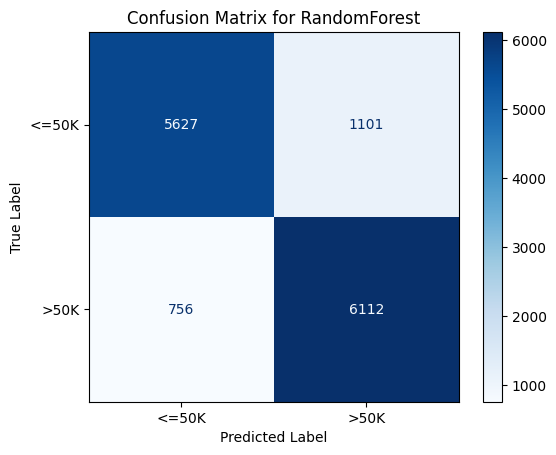

In [687]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['<=50K', '>50K'],)

# Plot confusion matrix
disp.plot(cmap="Blues")

# Add title and labels
plt.title('Confusion Matrix for RandomForest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

# Naive Bayes Model Training

In [683]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_accuracy(nb)

GaussianNB() training accuarcy  ---> 0.7667157043030526
GaussianNB() testing accuracy   ---> 0.7602971462194763


In [684]:
# Generate predictions for Naive Bayes
y_pred_nb = nb.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78      6728
           1       0.81      0.68      0.74      6868

    accuracy                           0.76     13596
   macro avg       0.77      0.76      0.76     13596
weighted avg       0.77      0.76      0.76     13596


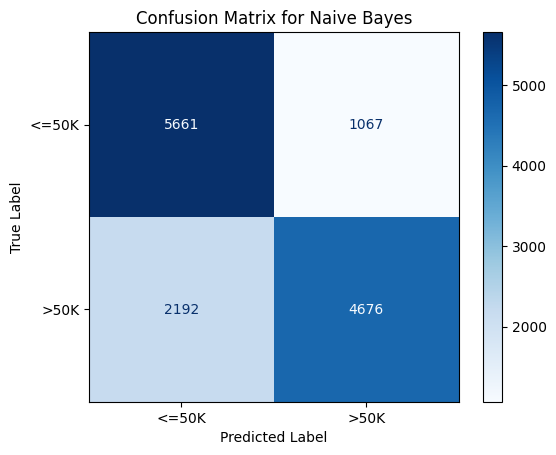

In [685]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['<=50K', '>50K'],)

# Plot confusion matrix
disp.plot(cmap="Blues")

# Add title and labels
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()

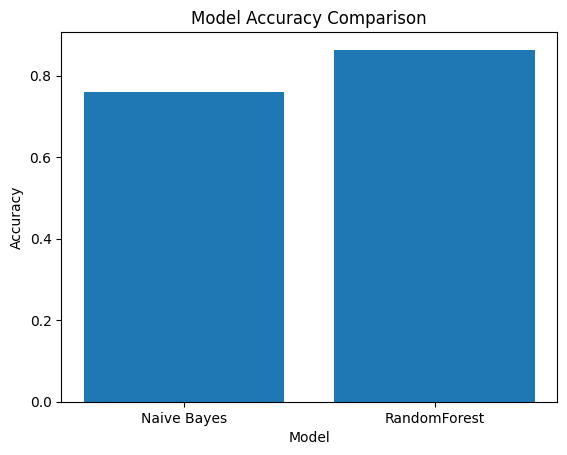

In [688]:
# Model Accuracy Comparison
models = ['Naive Bayes', 'RandomForest']
accuracy = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_rf)]

plt.bar(models, accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
